In [ ]:
from tensorflow.keras.models import Sequential
from os.path import join
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.applications import VGG19, VGG16, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, Softmax, Conv2D, MaxPooling2D, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name = '/device:GPU:0'

# Wczytanie i wektoryzacja danych

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir dataset

In [ ]:
!unzip drive/MyDrive/Mushrooms.zip -d /dataset

In [ ]:
# !mkdir dataset_cropped

In [ ]:
# !unzip drive/MyDrive/Mushrooms_cropped.zip -d /dataset_cropped

In [ ]:
!cd /dataset
!ls -l

In [ ]:
dataset_dir = "/dataset/Mushrooms"
# dataset_dir_cropped = "/dataset_cropped/Mushrooms"
input_size =(224, 224, 3)

## Croppowanie danych

In [ ]:
#from PIL import Image
#import cv2
#from IPython.display import display

#for dir in os.listdir(dataset_dir_cropped):
#  for file in os.listdir(dataset_dir_cropped + '/' + dir):

#    print(dir)
#    print(file)
#
#    file_path = os.path.join(dataset_dir_cropped, dir, file)
#    print(file_path)

#    crop_size = (224, 224)
#    img_stat = cv2.imread(file_path)
#    img = Image.open(file_path)
#    print(img_stat.shape)
#
#    height, width = img_stat.shape[0], img_stat.shape[1]
#    dy, dx = crop_size 
#    start_y = (height - dy) // 2
#    start_x = (width - dx) // 2
#    end_x = start_x + 224
#    end_y = start_y + 224

#    cropped = img.crop((start_x, start_y, end_x, end_y))

    # display(img,cropped)
    
#    cropped.save(file_path)

NameError: ignored

In [ ]:
#!zip -r /content/drive/MyDrive/archivename.zip /dataset_cropped/Mushrooms

## Obróbka danych oraz podział

In [ ]:
classes =[]
for f in os.listdir(dataset_dir):
        if not f.startswith('.'):
            classes.append(f)
classes
classes.sort()
classes

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [ ]:
idx_classes_dict = dict(enumerate(classes))
classes_idx_dict = {v: k for k, v in idx_classes_dict.items()}
idx_classes_dict

{0: 'Agaricus',
 1: 'Amanita',
 2: 'Boletus',
 3: 'Cortinarius',
 4: 'Entoloma',
 5: 'Hygrocybe',
 6: 'Lactarius',
 7: 'Russula',
 8: 'Suillus'}

**--- Dzielimy zbiór na treningowy i uczący ---**

In [ ]:
import shutil
out_dir: str = "/dataset/generator_results"

if os.path.exists(out_dir) and os.path.isdir(out_dir):
    shutil.rmtree(out_dir)

In [ ]:
import errno
import random
from typing import List


def create_symlink(src, dst):

    try:
        # Try to create a symlink
        os.symlink(src, dst)
    except OSError as e:
        if e.errno == errno.EEXIST:
            # If the symlink already exists, remove it...
            os.remove(dst)
            # And create a new one
            os.symlink(src, dst)


out_dir: str = "/dataset/generator_results"

if os.path.exists(out_dir) and os.path.isdir(out_dir):
    shutil.rmtree(out_dir)

balance_data: bool = False
train_size: float = 0.7

if balance_data:
    num_examples = {}
    for cls in classes:
        num_examples[cls] = len(
            [file for file in os.listdir(os.path.join(dataset_dir, cls))])
        
        print(num_examples)


for cls in classes:
        # Returns full paths to files from a given class
        files = [os.path.join(dataset_dir, cls, file) for file in \
                 os.listdir(os.path.join(dataset_dir, cls))]
        random.shuffle(files)

        if balance_data:
            least_examples = min(num_examples.values())
            files = files[:least_examples]

        print(files)

        train, val_test = train_test_split(files, test_size=(1. - train_size))
        val, test = train_test_split(val_test, test_size=0.5)

        train_dir = os.path.join(out_dir, 'train', cls)
        val_dir = os.path.join(out_dir, 'val', cls)
        test_dir = os.path.join(out_dir, 'test', cls)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        for file in train:
            dst = os.path.join(train_dir, os.path.basename(file))
            create_symlink(src=file, dst=dst)

        for file in val:
            dst = os.path.join(val_dir, os.path.basename(file))
            create_symlink(src=file, dst=dst)

        for file in test:
            dst = os.path.join(test_dir, os.path.basename(file))
            create_symlink(src=file, dst=dst)

['/dataset/Mushrooms/Agaricus/005_sUqyy4Yb9VY.jpg', '/dataset/Mushrooms/Agaricus/351_mHFbGn8oQ3M.jpg', '/dataset/Mushrooms/Agaricus/405_w_GdLI-O4XY.jpg', '/dataset/Mushrooms/Agaricus/332_lUnnnNbY9ws.jpg', '/dataset/Mushrooms/Agaricus/051_6AFRYRgtKzA.jpg', '/dataset/Mushrooms/Agaricus/413_4LTr0R0Dk8o.jpg', '/dataset/Mushrooms/Agaricus/371__arXHdYlaoY.jpg', '/dataset/Mushrooms/Agaricus/080_4ftkfkKrpAc.jpg', '/dataset/Mushrooms/Agaricus/071_DO9010arQN4.jpg', '/dataset/Mushrooms/Agaricus/277_RuUjCy9vjbw.jpg', '/dataset/Mushrooms/Agaricus/048_iC9glWRw_EM.jpg', '/dataset/Mushrooms/Agaricus/387_L20ypylGWTk.jpg', '/dataset/Mushrooms/Agaricus/049_ndkzIjp4CXQ.jpg', '/dataset/Mushrooms/Agaricus/141_099PmS-9Xww.jpg', '/dataset/Mushrooms/Agaricus/347_oS_mBPk9jc0.jpg', '/dataset/Mushrooms/Agaricus/159_nMO_hMm6V4A.jpg', '/dataset/Mushrooms/Agaricus/132_UA3dfTBxij0.jpg', '/dataset/Mushrooms/Agaricus/057_n1EFvW3JrYo.jpg', '/dataset/Mushrooms/Agaricus/438_uTWjQsEXep4.jpg', '/dataset/Mushrooms/Agaricus/0

In [ ]:
train_dir_main = os.path.join(out_dir, 'train')
val_dir_main = os.path.join(out_dir, 'val')
test_dir_main = os.path.join(out_dir, 'test')

In [ ]:
#from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(train_dir_main,
                                                 batch_size=8,
                                                 class_mode='categorical'
                                                 )

validation_generator = test_datagen.flow_from_directory(
                                                val_dir_main, 
                                                batch_size=8,
                                                class_mode='categorical',
                                                shuffle=False
                                                ) 

test_generator = test_datagen.flow_from_directory(
                                                test_dir_main, 
                                                batch_size=8,
                                                class_mode='categorical',
                                                shuffle=False
                                                ) 

Found 4695 images belonging to 9 classes.
Found 1007 images belonging to 9 classes.
Found 1011 images belonging to 9 classes.


In [ ]:
# To fix "Image File is truncated" error during training
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


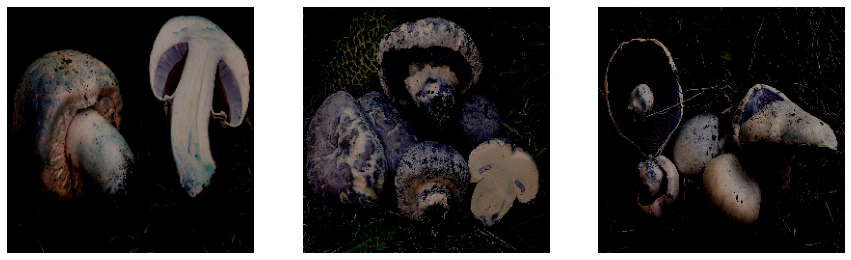

In [ ]:
import matplotlib.pyplot as plt

# iterator
#aug_iter = train_datagen.flow(train_generator, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(test_generator)[0][1]/255
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


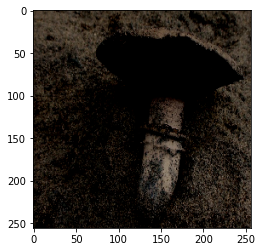

In [ ]:
x= test_generator.next()
for i in range(0,1):
    image = x[i][0]
    plt.imshow(image/255)
    plt.show()

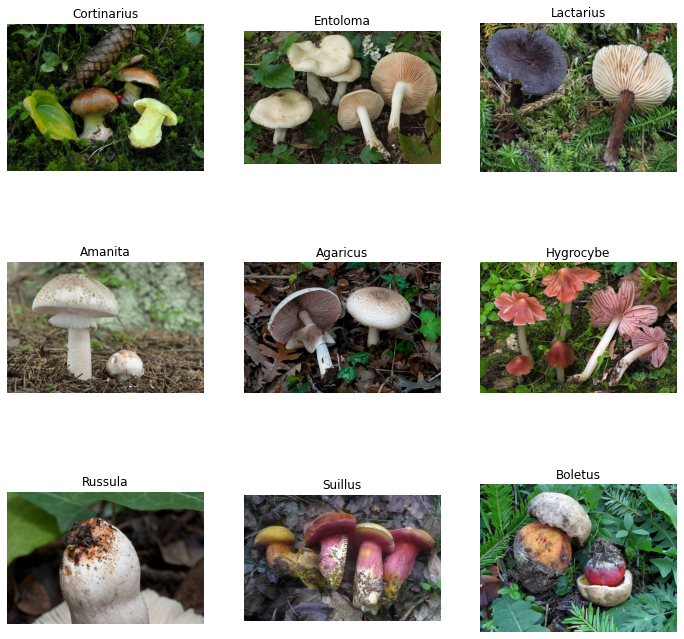

In [ ]:
# Displaying examples from each class

import matplotlib.image as mpimg

nrows = 3
ncols = 3

pos = 0

for subfolder in os.listdir(val_dir_main):
    
    image_file = os.listdir(os.path.join(val_dir_main, subfolder))[0]
    
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)

    pos += 1
    sp = plt.subplot(nrows, ncols, pos)

    cur_image = mpimg.imread(os.path.join(val_dir_main, subfolder, image_file))
    plt.imshow(cur_image)
    plt.title(subfolder)
    plt.axis('Off')

# Architektury

## Transfer learning sieci ResNet

In [ ]:
def resNet(input_shape, classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(32,activation='relu')(x)
    x = Dense(16,activation='relu')(x)
    x = Dropout(0.5)(x)
    preds = Dense(classes, activation='softmax')(x)
    model = Model(inputs=base_model.input,outputs=preds)

    # for l in base_model.layers:
    #   l.trainable = False

    for layer in base_model.layers[:143]:
      layer.trainable = False
    for layer in base_model.layers[143:]:
      layer.trainable = True

    # model.layers[0].trainable=False

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=1e-5),   
                  metrics=['acc'])
    return model

model = resNet(input_size, 9)

In [ ]:
from keras.callbacks import ModelCheckpoint

learning_rate = 1e-5
checkpoint = ModelCheckpoint("drive/MyDrive/Models/sign_classifier_resNet.h5", monitor = 'val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learning_rate, clipnorm = 1.), metrics = ['acc'])

In [ ]:
step_size_train = train_generator.n/train_generator.batch_size
step_size_val = validation_generator.samples // validation_generator.batch_size

fit_history = model.fit_generator(train_generator,
                     steps_per_epoch=step_size_train,
                     epochs=15,
                     validation_data=validation_generator,
                     validation_steps=step_size_val,
                     callbacks = [checkpoint],
                     verbose=1)

In [ ]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

In [ ]:
model.summary()

## Big Transfer

In [ ]:
# dict for imagenet

!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt

imagenet_int_to_str = {}

with open('ilsvrc2012_wordnet_lemmas.txt', 'r') as f:
  for i in range(1000):
    row = f.readline()
    row = row.rstrip()
    imagenet_int_to_str.update({i: row})

--2021-06-17 16:49:34--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt.3’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2021-06-17 16:49:34 (133 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt.3’ saved [21675/21675]



In [ ]:
# label names
our_age_labels = ['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [ ]:
import tensorflow_hub as hub
# Load model from TFHub into KerasLayer
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
module = hub.KerasLayer(model_url)

In [ ]:
# load model fine-tuned on ImageNet
model_url = "https://tfhub.dev/google/bit/m-r50x1/ilsvrc2012_classification/1"
imagenet_module = hub.KerasLayer(model_url)

In [ ]:
def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)  
  return image

def load_image_from_url(url):
  """Returns an image with shape [1, height, width, num_channels]."""
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

In [ ]:
# show the MAX_PREDS highest scoring labels:
MAX_PREDS = 5
# do not show labels with lower score than this:
MIN_SCORE = 0.8 

def show_preds(logits, image, correct_age_label=None, tf_age_logits=False):

  if len(logits.shape) > 1:
    logits = tf.reshape(logits, [-1])

  fig, axes = plt.subplots(1, 2, figsize=(7, 4), squeeze=False)

  ax1, ax2 = axes[0]

  ax1.axis('off')
  ax1.imshow(image)
  if correct_age_label is not None:
    ax1.set_title(our_age_labels[correct_age_label])
  classes = []
  scores = []
  logits_max = np.max(logits)
  softmax_denominator = np.sum(np.exp(logits - logits_max))
  for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
    score = 1.0/(1.0 + np.exp(-logits[j]))
    if score < MIN_SCORE: break
    if not tf_age_logits:
      # predicting in imagenet label space
      classes.append(imagenet_int_to_str[j])
    else:
      # predicting in age label space
      classes.append(our_age_labels[j])
    scores.append(np.exp(logits[j] - logits_max)/softmax_denominator*100)

  ax2.barh(np.arange(len(scores)) + 0.1, scores)
  ax2.set_xlim(0, 100)
  ax2.set_yticks(np.arange(len(scores)))
  ax2.yaxis.set_ticks_position('right')
  ax2.set_yticklabels(classes, rotation=0, fontsize=14)
  ax2.invert_xaxis()
  ax2.invert_yaxis()
  ax2.set_xlabel('Prediction probabilities', fontsize=11)
 

In [ ]:
import pathlib

data_dir = "/dataset/Mushrooms"

data_dir = pathlib.Path(data_dir)

IMG_HEIGHT = 224
IMG_WIDTH = 224

CLASS_NAMES = our_age_labels  # from plotting helper functions above
NUM_CLASSES = len(CLASS_NAMES)
num_examples = len(list(data_dir.glob('*/*.jpg')))

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  
  return tf.where(parts[-2] == CLASS_NAMES)[0][0]

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  return img  

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  features = {'image': img, 'label': label}
  return features

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
ds = list_ds.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
# split into train and test sets
train_split = 0.9
num_train = int(train_split * num_examples)
ds_train = ds.take(num_train)
ds_test = ds.skip(num_train)

DATASET_NUM_TRAIN_EXAMPLES = num_examples

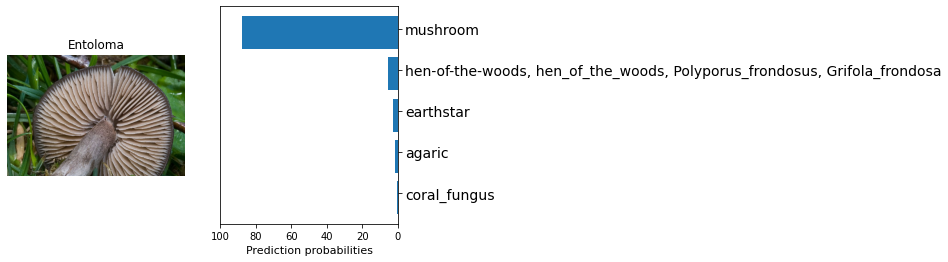

In [ ]:
for features in ds_train.take(1):
  image = features['image']
  image = preprocess_image(image)

  # run model on image
  logits = imagenet_module(image)
  
  # show image and predictions
  show_preds(logits, image[0], correct_age_label=features['label'].numpy())

In [ ]:
# add new head to the BiT model

class MyBiTModel(tf.keras.Model):
  """BiT with a new head."""

  def __init__(self, num_classes, module):
    super().__init__()

    self.num_classes = num_classes
    self.head = tf.keras.layers.Dense(num_classes, kernel_initializer='zeros')
    self.bit_model = module
  
  def call(self, images):
    bit_embedding = self.bit_model(images)
    return self.head(bit_embedding)

model = MyBiTModel(num_classes=NUM_CLASSES, module=module)

In [ ]:
# for lower resolution
RESIZE_TO = 160
CROP_TO = 128

# for higher resolution
#RESIZE_TO = 512
#CROP_TO = 480


# for less than 20 thousands pictures, so always for us
SCHEDULE_LENGTH = 500
SCHEDULE_BOUNDARIES = [200, 300, 400]

In [ ]:
BATCH_SIZE = 128
SCHEDULE_LENGTH = SCHEDULE_LENGTH * 512 / BATCH_SIZE

STEPS_PER_EPOCH = 10

def cast_to_tuple(features):
  return (features['image'], features['label'])
  
def preprocess_train(features):
  # Apply random crops and horizontal flips for all tasks 
  # except those for which cropping or flipping destroys the label semantics
  # (e.g. predict orientation of an object)
  features['image'] = tf.image.random_flip_left_right(features['image'])
  features['image'] = tf.image.resize(features['image'], [RESIZE_TO, RESIZE_TO])
  features['image'] = tf.image.random_crop(features['image'], [CROP_TO, CROP_TO, 3])
  features['image'] = tf.cast(features['image'], tf.float32) / 255.0
  return features

def preprocess_test(features):
  features['image'] = tf.image.resize(features['image'], [RESIZE_TO, RESIZE_TO])
  features['image'] = tf.cast(features['image'], tf.float32) / 255.0
  return features

pipeline_train = (ds_train
                  .shuffle(10000)
                  .repeat(int(SCHEDULE_LENGTH * BATCH_SIZE / DATASET_NUM_TRAIN_EXAMPLES * STEPS_PER_EPOCH) + 1 + 50)  # repeat dataset_size / num_steps
                  .map(preprocess_train, num_parallel_calls=8)
                  .batch(BATCH_SIZE)
                  .map(cast_to_tuple)  # for keras model.fit
                  .prefetch(2))

pipeline_test = (ds_test.map(preprocess_test, num_parallel_calls=1)
                  .map(cast_to_tuple)  # for keras model.fit
                  .batch(BATCH_SIZE)
                  .prefetch(2))

In [ ]:
# optimiser and loss

lr = 0.003 * BATCH_SIZE / 512 

# decay learning rate
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES, 
                                                                   values=[lr, lr*0.1, lr*0.001, lr*0.0001])
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

# fine-tune model
history = model.fit(
    pipeline_train,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs= int(SCHEDULE_LENGTH / STEPS_PER_EPOCH),  
    validation_data=pipeline_test  
)

Epoch 1/200


In [ ]:
# save fine-tuned model
export_module_dir = '/tmp/my_saved_bit_model/'
tf.saved_model.save(model, export_module_dir)

In [ ]:
# load saved model
saved_module = hub.KerasLayer(export_module_dir, trainable=True)



In [ ]:
for features in ds_train.take(1):
  image = features['image']
  image = preprocess_image(image)
  image = tf.image.resize(image, [CROP_TO, CROP_TO])

  # run model on image
  logits = saved_module(image)
  
  # show image and predictions
  show_preds(logits, image[0], correct_age_label=features['label'].numpy(), tf_age_logits=True)

# Statystyki z trenowania

In [ ]:
from tensorflow.python.keras.models import load_model
model = load_model("drive/MyDrive/Models/sign_classifier_resNet.h5")

In [ ]:
print(fit_history.history.keys())

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model acc')  
plt.ylabel('acc')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, figname,
                          normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print("Confusion matrix, without normalization")
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.savefig(figname)


In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

# Zapis modelu 

In [ ]:
score=model.evaluate(validation_generator, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [ ]:
from keras.models import model_from_json

model_json = model.to_json()
with open("drive/MyDrive/Models/modelResNet.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("drive/MyDrive/Models//modelResNet.h5")

**--- Załadowanie wytrenowanego modelu ---**

In [ ]:
from keras.models import model_from_json

json_file = open("drive/MyDrive/Models/modelResNet.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("drive/MyDrive/Models/modelResNet.h5", by_name=True, skip_mismatch=False)

loaded_model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=2e-4),   
                  metrics=['acc'])
score=loaded_model.evaluate(validation_generator, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

# Załadowanie danych testowych z folderu "test" do sprawdzenia predykcji wytrenowanej sieci

In [ ]:
test_dir_main = os.path.join(out_dir, 'test')
test_dir_main

In [ ]:
def _image_to_array(filename, target_size=input_size):
    img = Image.open(filename)
    img.load()
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size)
    x = np.asarray(img, dtype="int32")
    return x

In [ ]:
import matplotlib.pyplot as plt
import glob

files = glob.glob('/dataset/generator_results/test/Amanita/*')
# for dir in dirs:
#   files = glob.glob(dir + '/*')
for file in files:
    print(type(file))
    image = _image_to_array(file, input_size[:2])
    fig = plt.figure()
    plt.imshow(image)
    display(fig)
    image = np.expand_dims(image, axis=0) # macierz o rozmiarze wejściowym sieci
    y = model.predict(image)
    print(y) 

    print(np.argmax(y, axis=1)) # wyciągnięcie indeksu wartości, która jest najwyższa w wektorze y 
    predictedClass = np.argmax(y, axis=1)
    print("Zdjęcie należy do klasy: " + idx_classes_dict.get(predictedClass[0], '19'))   
    print("=================================================================")